## Sentiment Analysis with Textblob

In [5]:
# import libraries
import pandas as pd
import numpy as np
import pickle

In [6]:
# load data
data_cleaned = pd.read_csv('../yelp_dataset/yelp_data_cleaned.csv')

In [7]:
data_cleaned.head()

,text,date,review_stars,business_name,address,business_stars,is_open,attributes,categories,user_name,user_review_count,average_stars
0,"If I could give half a star I would, I'm from ...",2012-11-06 03:44:19,1.0,Bar-B-Cutie,1787 Gallatin Pike N,3.5,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Restaurants, Barbeque",Sam,7,2.14
1,I used to live in Pa. and have a thing for Ita...,2012-11-06 03:53:13,4.0,Jersey Mike's Subs,"1706 Gallatin Pike N, Ste 8A",2.0,1,"{'Alcohol': ""'none'"", 'Caters': 'True', 'Busin...","Sandwiches, Restaurants, Fast Food, Delis",Sam,7,2.14
2,Tried and true Southern BBQ! The drive thru w...,2015-04-29 23:34:13,5.0,Bar-B-Cutie,1787 Gallatin Pike N,3.5,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Restaurants, Barbeque",Sugar,138,3.76
3,Place is in a strip mall. Very unassuming plac...,2015-12-21 02:21:10,4.0,Bar-B-Cutie,1787 Gallatin Pike N,3.5,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Restaurants, Barbeque",Tim,604,3.70
4,Food is always good and service is excellent. ...,2016-06-23 16:46:56,5.0,Bar-B-Cutie,1787 Gallatin Pike N,3.5,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Restaurants, Barbeque",Kristin,6,3.57


In [8]:
data_cleaned.shape

(3521, 12)

In [9]:
data_cleaned.describe()

,review_stars,business_stars,is_open,user_review_count,average_stars
count,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000
mean,3.451292,3.390230,0.700937,71.906277,3.570719
std,1.622804,0.967266,0.457912,327.622573,0.965513
min,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,2.500000,0.000000,6.000000,3.130000
50%,4.000000,3.500000,1.000000,16.000000,3.740000
75%,5.000000,4.000000,1.000000,53.000000,4.210000
max,5.000000,5.000000,1.000000,16567.000000,5.000000


### Select just text and review_stars data

In [10]:
data = data_cleaned[['text', 'review_stars']]
data.head()

,text,review_stars
0,"If I could give half a star I would, I'm from ...",1.0
1,I used to live in Pa. and have a thing for Ita...,4.0
2,Tried and true Southern BBQ! The drive thru w...,5.0
3,Place is in a strip mall. Very unassuming plac...,4.0
4,Food is always good and service is excellent. ...,5.0


### Add a column for high-low, where high is 4 stars and above, and low is below 4 stars

In [11]:
data['high_low'] = [1 if x >= 4 else 0 for x in data['review_stars']]
data.head()

C:\Users\TEJAS\AppData\Local\Temp\ipykernel_13204\2206504436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['high_low'] = [1 if x >= 4 else 0 for x in data['review_stars']]


,text,review_stars,high_low
0,"If I could give half a star I would, I'm from ...",1.0,0
1,I used to live in Pa. and have a thing for Ita...,4.0,1
2,Tried and true Southern BBQ! The drive thru w...,5.0,1
3,Place is in a strip mall. Very unassuming plac...,4.0,1
4,Food is always good and service is excellent. ...,5.0,1


In [12]:
data.describe()

,review_stars,high_low
count,3521.000000,3521.000000
mean,3.451292,0.591593
std,1.622804,0.491609
min,1.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [13]:
data.review_stars.value_counts()

review_stars
5.0    1450
1.0     805
4.0     633
2.0     334
3.0     299
Name: count, dtype: int64

In [14]:
data.high_low.value_counts()

high_low
1    2083
0    1438
Name: count, dtype: int64

<Axes: >

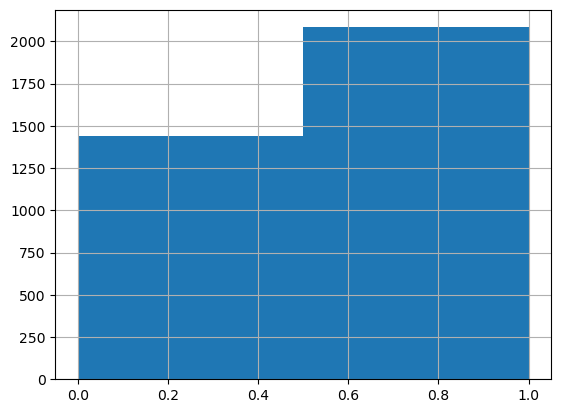

In [15]:
data.high_low.hist(bins=2)

### Clean the text column

In [16]:
data['cleaned_text'] = data['text'].str.replace('[^\w\s]','')
data.head()

C:\Users\TEJAS\AppData\Local\Temp\ipykernel_13204\3242496970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['text'].str.replace('[^\w\s]','')


,text,review_stars,high_low,cleaned_text
0,"If I could give half a star I would, I'm from ...",1.0,0,"If I could give half a star I would, I'm from ..."
1,I used to live in Pa. and have a thing for Ita...,4.0,1,I used to live in Pa. and have a thing for Ita...
2,Tried and true Southern BBQ! The drive thru w...,5.0,1,Tried and true Southern BBQ! The drive thru w...
3,Place is in a strip mall. Very unassuming plac...,4.0,1,Place is in a strip mall. Very unassuming plac...
4,Food is always good and service is excellent. ...,5.0,1,Food is always good and service is excellent. ...


In [17]:
data['cleaned_text'] = data['cleaned_text'].str.lower()
data['cleaned_text'] = data['cleaned_text'].str.replace('\n', ' ')
data.head()

C:\Users\TEJAS\AppData\Local\Temp\ipykernel_13204\1942278716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['cleaned_text'].str.lower()
C:\Users\TEJAS\AppData\Local\Temp\ipykernel_13204\1942278716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['cleaned_text'].str.replace('\n', ' ')


,text,review_stars,high_low,cleaned_text
0,"If I could give half a star I would, I'm from ...",1.0,0,"if i could give half a star i would, i'm from ..."
1,I used to live in Pa. and have a thing for Ita...,4.0,1,i used to live in pa. and have a thing for ita...
2,Tried and true Southern BBQ! The drive thru w...,5.0,1,tried and true southern bbq! the drive thru w...
3,Place is in a strip mall. Very unassuming plac...,4.0,1,place is in a strip mall. very unassuming plac...
4,Food is always good and service is excellent. ...,5.0,1,food is always good and service is excellent. ...


### Analyze sentiment using Textblob package
- Sentiment is give as a score between -1 and +1. The lower the score, the greater the probability of the sentiment being negative. The greater the score, greate the probability of the sentiment being positive.
- Use this package to establish a baseline in analyzing sentiment

In [21]:
from textblob import TextBlob

ModuleNotFoundError: No module named 'textblob'

In [20]:
data['textblob_sentiment'] = data['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
data.head()

NameError: name 'TextBlob' is not defined

### Get high and low dataframes, and visualize frequent words using a word cloud

In [16]:
# Data High (stars >= 4)
data_high = data[data['high_low'] == 1]
data_high = data_high.sort_values(by='textblob_sentiment', ascending=False)
data_high.head()

,text,review_stars,high_low,cleaned_text,textblob_sentiment
598,Robert and I had Bento boxes for lunch yesterd...,5.0,1,robert and i had bento boxes for lunch yesterd...,1.0
1776,Great place to have a meeting or stop by for d...,5.0,1,great place to have a meeting or stop by for d...,1.0
82,One of the best! Every time I'm in town got to...,5.0,1,one of the best! every time i'm in town got to...,1.0
3389,Best McFlurry of my life. The staff was so hel...,5.0,1,best mcflurry of my life. the staff was so hel...,1.0
2625,Plenty of food for your money and it is very d...,5.0,1,plenty of food for your money and it is very d...,1.0


In [17]:
# Data Low (stars < 4)
data_low = data[data['high_low'] == 0]
data_low = data_low.sort_values(by='textblob_sentiment')
data_low.head()

,text,review_stars,high_low,cleaned_text,textblob_sentiment
1361,I was eating takeout from this KFC. While eati...,1.0,0,i was eating takeout from this kfc. while eati...,-1.000000
3374,The worst customer service I have ever had. T...,1.0,0,the worst customer service i have ever had. t...,-1.000000
2572,Is was horrible the food was cold and it wasn'...,1.0,0,is was horrible the food was cold and it wasn'...,-0.880952
959,This has to be the dirtiest restaurant I've be...,1.0,0,this has to be the dirtiest restaurant i've be...,-0.833333
3335,Terrible service.....took forever to get our f...,1.0,0,terrible service.....took forever to get our f...,-0.750000


In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

#### High rating word cloud

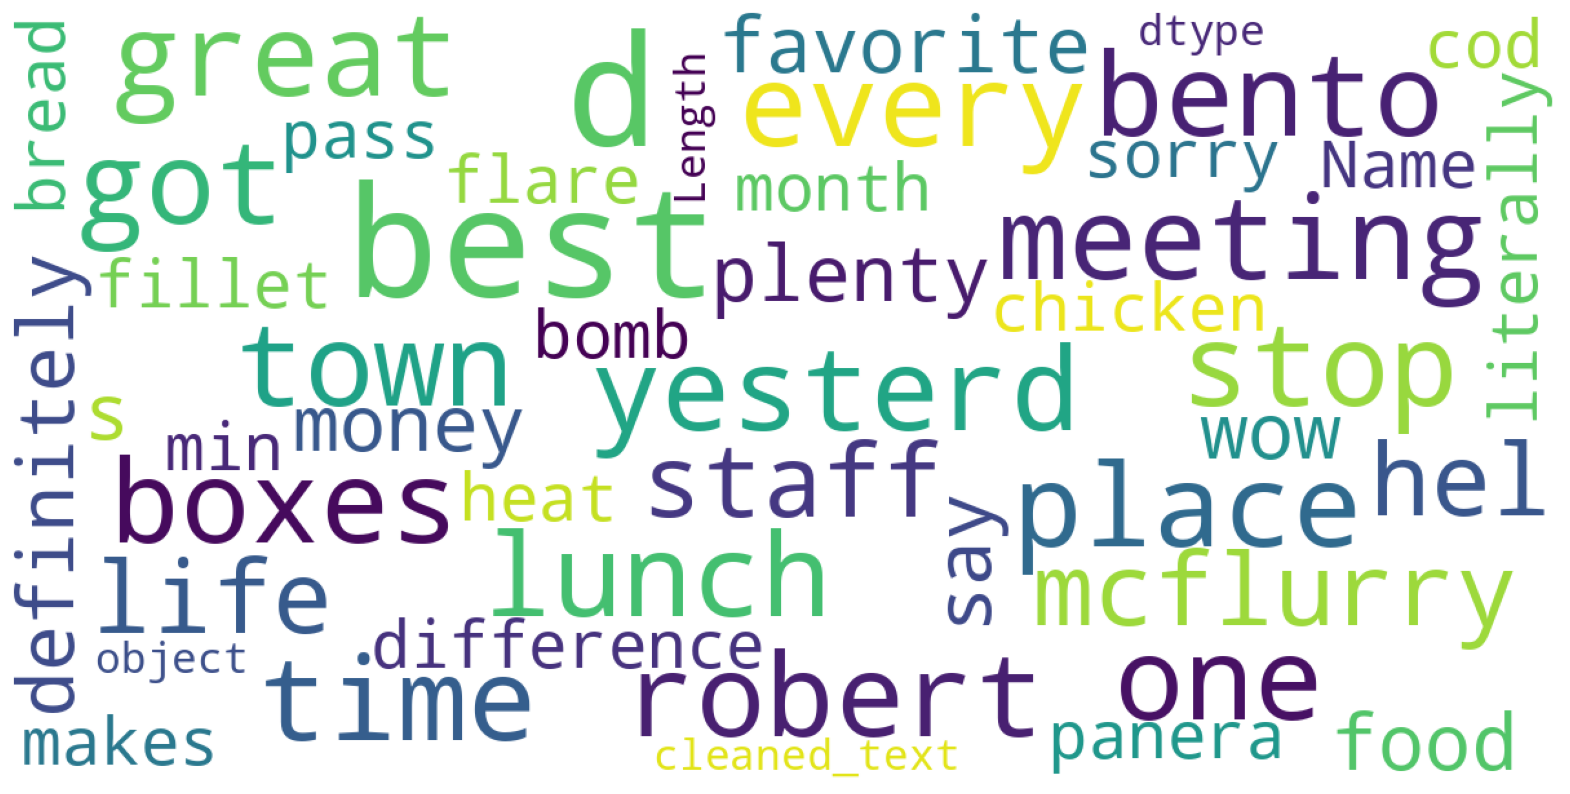

In [20]:
show_wordcloud(data_high['cleaned_text'])

#### Low Ratings word cloud

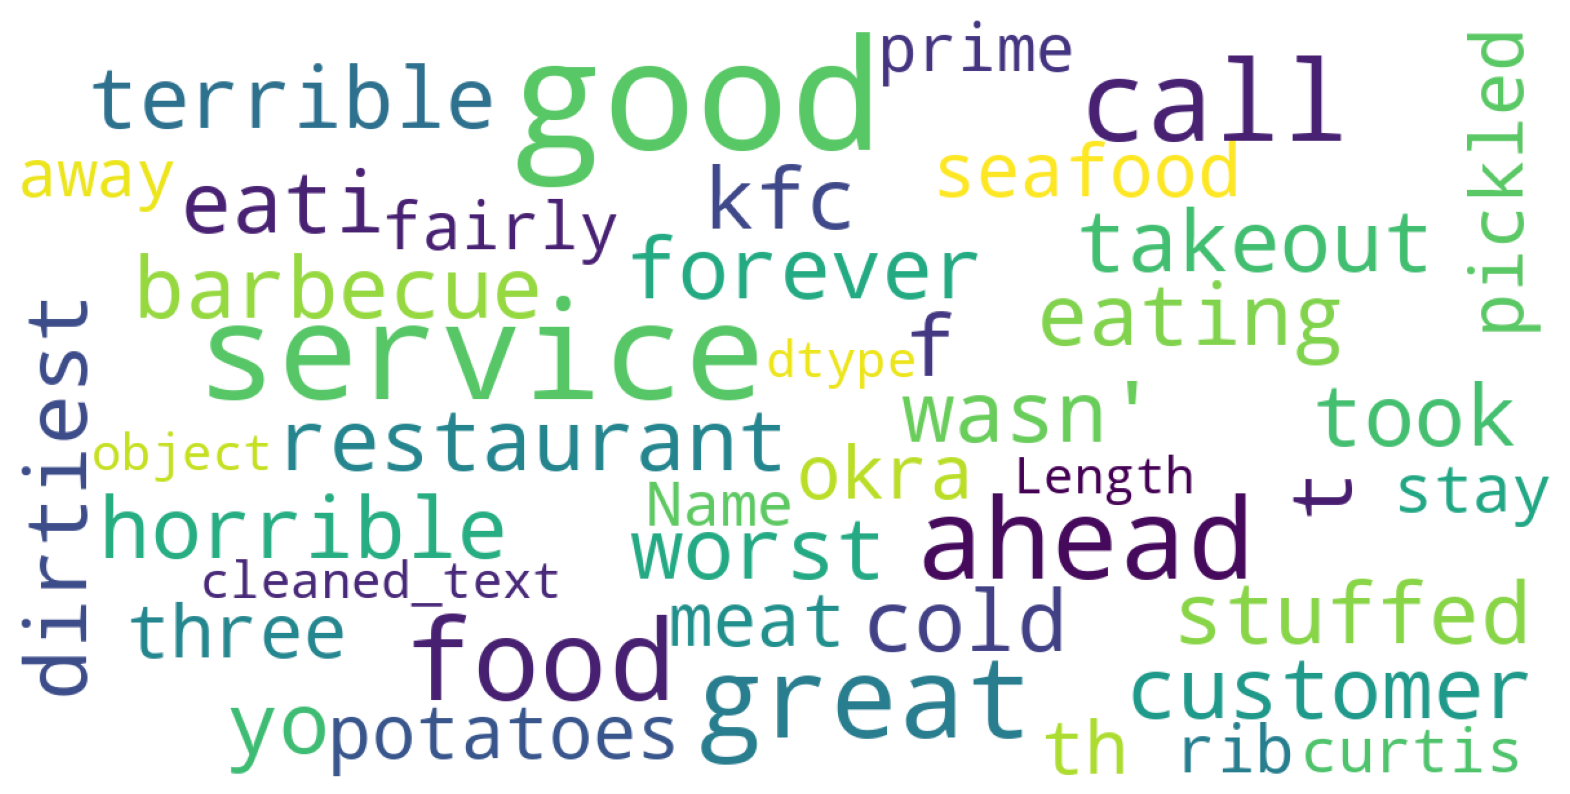

In [21]:
show_wordcloud(data_low['cleaned_text'])

## Train Model on classic IMDB moview review dataset

In [22]:
# get IMDB dataset
from keras.datasets import imdb
top_words = 10000 # total of 10000 words are contained in the dictionary
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [23]:
word_dict = imdb.get_word_index()
word_dict = {key: (value+3) for (key, value) in word_dict.items()}

word_dict[''] = 0 # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown

reverse_word_dict = {value: key for key, value in word_dict.items()}

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
from keras.preprocessing import sequence
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
print(X_train.shape, X_test.shape)

(25000, 500) (25000, 500)


In [25]:
import pandas as pd
dfff = pd.DataFrame(X_train)
dfff.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0,0,0,0,0,0,0,0,0,0,...,4472,113,103,32,15,16,5345,19,178,32
1,0,0,0,0,0,0,0,0,0,0,...,52,154,462,33,89,78,285,16,145,95
2,0,0,0,0,0,0,0,0,0,0,...,106,607,624,35,534,6,227,7,129,113
3,687,23,4,2,7339,6,3693,42,38,39,...,26,49,7008,15,566,30,579,21,64,2574
4,0,0,0,0,0,0,0,0,0,0,...,19,14,5,7224,6,226,251,7,61,113


### Model Training

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [27]:
def sequence_to_text(sequence):
    return ' '.join([reverse_word_dict.get(i, '?') for i in sequence])

In [28]:
# Convert the sequences to text for train and test sets
X_train_text = [sequence_to_text(seq) for seq in X_train]
X_test_text = [sequence_to_text(seq) for seq in X_test]


In [29]:
# Create Document-Term Matrix using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=top_words)
X_train_dtm = vectorizer.fit_transform(X_train_text)
X_test_dtm = vectorizer.transform(X_test_text)

In [40]:
# Save the vectorizer as as a pickle file
with open('../vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("Vectorizer saved successfully...")

Vectorizer saved successfully...


In [30]:
# Train Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train_dtm, y_train)

MultinomialNB()

In [33]:
# Save the model as a pickle file
with open('../sentiment_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model saved successfully...")

Model saved successfully...


In [34]:
# Predict and evaluate
y_pred = model.predict(X_test_dtm)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy on IMDB test set:", accuracy)

Naive Bayes Accuracy on IMDB test set: 0.83928


## Build a function to apply this model to our Yelp data

In [35]:
import string
import numpy as np

In [36]:
def analyzer(text):
    # Join list of tokens into a single string if necessary
    if isinstance(text, list):
        text = ' '.join(text)

    # Remove punctuation and tokenize text
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    # Transform text using the trained vectorizer
    text_vector = vectorizer.transform([text])

    # Predict sentiment
    result = model.predict(text_vector)[0]
    return result

In [37]:
data2 = data
data2.head()

,text,review_stars,high_low,cleaned_text
0,"If I could give half a star I would, I'm from ...",1.0,0,"if i could give half a star i would, i'm from ..."
1,I used to live in Pa. and have a thing for Ita...,4.0,1,i used to live in pa. and have a thing for ita...
2,Tried and true Southern BBQ! The drive thru w...,5.0,1,tried and true southern bbq! the drive thru w...
3,Place is in a strip mall. Very unassuming plac...,4.0,1,place is in a strip mall. very unassuming plac...
4,Food is always good and service is excellent. ...,5.0,1,food is always good and service is excellent. ...


In [38]:
data2['model_sentiment'] = data['cleaned_text'].apply(lambda x: analyzer(x))
data2

C:\Users\TEJAS\AppData\Local\Temp\ipykernel_13204\961989054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['model_sentiment'] = data['cleaned_text'].apply(lambda x: analyzer(x))


,text,review_stars,high_low,cleaned_text,model_sentiment
0,"If I could give half a star I would, I'm from ...",1.0,0,"if i could give half a star i would, i'm from ...",0
1,I used to live in Pa. and have a thing for Ita...,4.0,1,i used to live in pa. and have a thing for ita...,0
2,Tried and true Southern BBQ! The drive thru w...,5.0,1,tried and true southern bbq! the drive thru w...,1
3,Place is in a strip mall. Very unassuming plac...,4.0,1,place is in a strip mall. very unassuming plac...,1
4,Food is always good and service is excellent. ...,5.0,1,food is always good and service is excellent. ...,1
...,...,...,...,...,...
3516,Terrible service. Short girl was very rude. ...,1.0,0,terrible service. short girl was very rude. ...,0
3517,Disgrace to the Chipotle name. Avoid this loca...,1.0,0,disgrace to the chipotle name. avoid this loca...,0
3518,Arrived at opening. Dinning room tables and fl...,2.0,0,arrived at opening. dinning room tables and fl...,0
3519,This location is highly nasty and unsanitary! ...,1.0,0,this location is highly nasty and unsanitary! ...,0


In [39]:
print(f"Accuracy of model sentiment vs review stars (high_low): {round(accuracy_score(data2['model_sentiment'], data2['high_low']), 3)*100}%")

Accuracy of model sentiment vs review stars (high_low): 79.2%
